## Importing necessary modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading in the data

In [2]:
# reading the data from an excel file hence we use read_excel function
train_data = pd.read_excel(r'D:\Python Workspace\Analytics and ML\Data_Train.xlsx')

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
train_data.shape

(10683, 11)

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


### Dropping null values

In [7]:
train_data.isna().sum() #There are not a lot of null values

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [8]:
train_data.dropna(inplace=True)

In [9]:
train_data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [10]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


All the features are of object data type. So we have to carry out data pre-processing before giving it to the model

### Converting Departure Time Column

In [11]:
train_data['Dep_hour'] = pd.to_datetime(train_data['Dep_Time']).dt.hour

In [12]:
train_data['Dep_min'] = pd.to_datetime(train_data['Dep_Time']).dt.minute

In [13]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Dep_hour,Dep_min
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,22,20
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,50
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,25
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,18,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,16,50


In [14]:
train_data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
Dep_hour           0
Dep_min            0
dtype: int64

In [15]:
train_data.drop(['Dep_Time'], axis=1, inplace=True)

## Splitting Date into Month and Day

In [16]:
train_data['Date_of_Journey'][0].split('/')

['24', '03', '2019']

In [17]:
train_data['Journey_month'] = pd.to_datetime(train_data['Date_of_Journey']).dt.month

C:\Users\patil\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '24/03/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\patil\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '24/06/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\patil\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '27/05/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\patil\AppData\Local\Programs\Python\Python39\lib\site-packages\p

In [18]:
train_data['Journey_month']

0         3
1         1
2         9
3        12
4         1
         ..
10678     9
10679     4
10680     4
10681     1
10682     9
Name: Journey_month, Length: 10682, dtype: int64

In [19]:
train_data['Journey_day'] = pd.to_datetime(train_data['Date_of_Journey']).dt.day

C:\Users\patil\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '24/03/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\patil\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '24/06/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\patil\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '27/05/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\patil\AppData\Local\Programs\Python\Python39\lib\site-packages\p

In [20]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Dep_hour,Dep_min,Journey_month,Journey_day
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,22,20,3,24
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,5,50,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,25,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,18,5,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,16,50,1,3


In [21]:
train_data.drop(['Date_of_Journey'], axis=1, inplace=True)

In [22]:
train_data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Dep_hour,Dep_min,Journey_month,Journey_day
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,22,20,3,24
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,5,50,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,25,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,18,5,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,16,50,1,3


## Splitting Duration in hour and minute

In [23]:
train_data['Duration'][:10]

0     2h 50m
1     7h 25m
2        19h
3     5h 25m
4     4h 45m
5     2h 25m
6    15h 30m
7     21h 5m
8    25h 30m
9     7h 50m
Name: Duration, dtype: object

In [24]:
train_data['Duration'][2].strip()+" 0m"

'19h 0m'

In [25]:
dur_list = list(train_data['Duration'])
duration_hrs = []
duration_mins = []
for i in range(len(dur_list)):
    if len(dur_list[i].split())!=2:
        if "h" in dur_list[i]:
            dur_list[i] = dur_list[i].strip()+" 0m"
        else:
            dur_list[i] = "0h "+dur_list[i].strip()
for i in range(len(dur_list)):
    #duration_hrs.append(int(dur_list[i].split(sep="h")[0]))
    duration_hrs.append(int(dur_list[i].split(sep = "h")[0]))
    duration_mins.append(int(dur_list[i].split(sep="m")[0].split()[-1]))

In [26]:
train_data['Duration_hours'] = duration_hrs
train_data['Duration_mins'] = duration_mins

In [27]:
train_data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Dep_hour,Dep_min,Journey_month,Journey_day,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,22,20,3,24,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,5,50,1,5,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,25,9,6,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,18,5,12,5,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,16,50,1,3,4,45


In [28]:
train_data.drop(['Duration'], axis=1, inplace=True)

In [29]:
train_data.head()

,Airline,Source,Destination,Route,Arrival_Time,Total_Stops,Additional_Info,Price,Dep_hour,Dep_min,Journey_month,Journey_day,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,non-stop,No info,3897,22,20,3,24,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,2 stops,No info,7662,5,50,1,5,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,2 stops,No info,13882,9,25,9,6,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,1 stop,No info,6218,18,5,12,5,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,1 stop,No info,13302,16,50,1,3,4,45


## Splitting Arrival time into hour and minute

In [30]:
train_data['Arrival_min'] = pd.to_datetime(train_data['Arrival_Time']).dt.minute
train_data['Arrival_hour'] = pd.to_datetime(train_data['Arrival_Time']).dt.hour

In [31]:
train_data.head()

,Airline,Source,Destination,Route,Arrival_Time,Total_Stops,Additional_Info,Price,Dep_hour,Dep_min,Journey_month,Journey_day,Duration_hours,Duration_mins,Arrival_min,Arrival_hour
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,non-stop,No info,3897,22,20,3,24,2,50,10,1
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,2 stops,No info,7662,5,50,1,5,7,25,15,13
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,2 stops,No info,13882,9,25,9,6,19,0,25,4
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,1 stop,No info,6218,18,5,12,5,5,25,30,23
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,1 stop,No info,13302,16,50,1,3,4,45,35,21


In [32]:
train_data.drop(['Arrival_Time'],axis=1,inplace=True)

In [33]:
train_data.head()
train_data.isna().sum()

Airline            0
Source             0
Destination        0
Route              0
Total_Stops        0
Additional_Info    0
Price              0
Dep_hour           0
Dep_min            0
Journey_month      0
Journey_day        0
Duration_hours     0
Duration_mins      0
Arrival_min        0
Arrival_hour       0
dtype: int64

## Exploring Additional Info column

In [34]:
train_data['Additional_Info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [35]:
x = train_data.loc[train_data['Additional_Info'] == 'No info'].Price
np.mean(x)

9141.519295302014

In [36]:
x = train_data.loc[train_data['Additional_Info'] == 'In-flight meal not included'].Price 
np.mean(x)

9471.834510595358

In [37]:
x = train_data.loc[train_data['Additional_Info'] == 'No check-in baggage included'].Price 
np.mean(x)

3645.15625

In [38]:
train_data.loc[train_data['Dep_hour']>=20].Price 

0         3897
11        4174
13        9663
18       13381
21        6955
         ...  
10667    11087
10671     3100
10672    11150
10674    11087
10679     4145
Name: Price, Length: 1691, dtype: int64

## Checking for number of stops

In [39]:
train_data['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [40]:
stops = {'non-stop': 0, '1 stop': 1, '2 stops': 2, '3 stops': 3, '4 stops': 4}
train_data.replace(stops, inplace = True)

In [41]:
train_data

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Dep_hour,Dep_min,Journey_month,Journey_day,Duration_hours,Duration_mins,Arrival_min,Arrival_hour
0,IndiGo,Banglore,New Delhi,BLR → DEL,0,No info,3897,22,20,3,24,2,50,10,1
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,No info,7662,5,50,1,5,7,25,15,13
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2,No info,13882,9,25,9,6,19,0,25,4
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1,No info,6218,18,5,12,5,5,25,30,23
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1,No info,13302,16,50,1,3,4,45,35,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,0,No info,4107,19,55,9,4,2,30,25,22
10679,Air India,Kolkata,Banglore,CCU → BLR,0,No info,4145,20,45,4,27,2,35,20,23
10680,Jet Airways,Banglore,Delhi,BLR → DEL,0,No info,7229,8,20,4,27,3,0,20,11
10681,Vistara,Banglore,New Delhi,BLR → DEL,0,No info,12648,11,30,1,3,2,40,10,14


## Encoding the values in Airline column

In [42]:
Airline = train_data[['Airline']]
Airline['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [43]:
Airline = pd.get_dummies(Airline, drop_first= True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


## Encoding the values in Source column

In [44]:
Source = train_data[["Source"]]
Source = pd.get_dummies(Source, drop_first= True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


## Encoding the values in Destination column

In [45]:
Destination = train_data[["Destination"]]
Destination = pd.get_dummies(Destination, drop_first = True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [46]:
train_data.drop(["Route"], axis = 1, inplace = True) #dropping routes column

In [47]:
train_data.shape

(10682, 14)

In [48]:
train_data['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [49]:
data_train = pd.concat([train_data, Airline, Source, Destination], axis = 1)

## Dropping unnecessary columns

In [50]:
data_train.drop(["Airline", "Source", "Destination","Additional_Info"], axis = 1, inplace = True)

In [51]:
data_train

,Total_Stops,Price,Dep_hour,Dep_min,Journey_month,Journey_day,Duration_hours,Duration_mins,Arrival_min,Arrival_hour,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,22,20,3,24,2,50,10,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,5,50,1,5,7,25,15,13,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,25,9,6,19,0,25,4,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,18,5,12,5,5,25,30,23,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,16,50,1,3,4,45,35,21,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,4107,19,55,9,4,2,30,25,22,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
10679,0,4145,20,45,4,27,2,35,20,23,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
10680,0,7229,8,20,4,27,3,0,20,11,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
10681,0,12648,11,30,1,3,2,40,10,14,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


In [52]:
data_train.shape

(10682, 30)

In [53]:
data_train.isnull().sum()

Total_Stops                                  0
Price                                        0
Dep_hour                                     0
Dep_min                                      0
Journey_month                                0
Journey_day                                  0
Duration_hours                               0
Duration_mins                                0
Arrival_min                                  0
Arrival_hour                                 0
Airline_Air India                            0
Airline_GoAir                                0
Airline_IndiGo                               0
Airline_Jet Airways                          0
Airline_Jet Airways Business                 0
Airline_Multiple carriers                    0
Airline_Multiple carriers Premium economy    0
Airline_SpiceJet                             0
Airline_Trujet                               0
Airline_Vistara                              0
Airline_Vistara Premium economy              0
Source_Chenna

## Adding 2 new columns

Adding night_flights and peak_season column. Usually it is seen that night flights are cheaper and flight price during peak season is high. Here peak season is Diwali, Christmas(most celebrated festivals) and summer holiday times.

In [54]:
night_flights = []
for i in data_train['Dep_hour']:
    if i>=20:
        night_flights.append(1)
    else:
        night_flights.append(0)

In [55]:
data_train['Night_flights'] = night_flights

In [56]:
data_train.shape

(10682, 31)

In [57]:
data_train.head(20)

,Total_Stops,Price,Dep_hour,Dep_min,Journey_month,Journey_day,Duration_hours,Duration_mins,Arrival_min,Arrival_hour,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Night_flights
0,0,3897,22,20,3,24,2,50,10,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
1,2,7662,5,50,1,5,7,25,15,13,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,2,13882,9,25,9,6,19,0,25,4,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
3,1,6218,18,5,12,5,5,25,30,23,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,13302,16,50,1,3,4,45,35,21,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
5,0,3873,9,0,6,24,2,25,25,11,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
6,1,11087,18,55,12,3,15,30,25,10,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
7,1,22270,8,0,1,3,21,5,5,5,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
8,1,11087,8,55,12,3,25,30,25,10,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
9,1,8625,11,25,5,27,7,50,15,19,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0


In [58]:
#may:5 march:3 october:10 november:11 december:12
peak_season = []
for i in data_train['Journey_month']:
    if i==4 or i==5 or i==6 or i==11 or i==12:
        peak_season.append(1)
    else:
        peak_season.append(0)

In [59]:
data_train['Peak_season'] = peak_season

In [60]:
data_train.shape

(10682, 32)

In [61]:
data_train.head(20)

,Total_Stops,Price,Dep_hour,Dep_min,Journey_month,Journey_day,Duration_hours,Duration_mins,Arrival_min,Arrival_hour,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Night_flights,Peak_season
0,0,3897,22,20,3,24,2,50,10,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
1,2,7662,5,50,1,5,7,25,15,13,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,2,13882,9,25,9,6,19,0,25,4,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
3,1,6218,18,5,12,5,5,25,30,23,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
4,1,13302,16,50,1,3,4,45,35,21,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
5,0,3873,9,0,6,24,2,25,25,11,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1
6,1,11087,18,55,12,3,15,30,25,10,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
7,1,22270,8,0,1,3,21,5,5,5,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
8,1,11087,8,55,12,3,25,30,25,10,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
9,1,8625,11,25,5,27,7,50,15,19,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1


## Test Set 

In [62]:
test_data = pd.read_excel(r"D:\Python Workspace\Analytics and ML\Test_set.xlsx")

In [63]:
test_data.shape

(2671, 10)

In [64]:
pd.set_option('display.max_columns', None)

In [65]:
test_data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [66]:
test_data['Airline'].value_counts()

Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Vistara Premium economy                2
Jet Airways Business                   2
Name: Airline, dtype: int64

In [67]:
# Preprocessing

print("Test data Info")
print("-"*75)
print(test_data.info())

print()
print()

print("Null values :")
print("-"*75)
test_data.dropna(inplace = True)
print(test_data.isnull().sum())

# EDA

# Date_of_Journey
test_data["Journey_day"] = pd.to_datetime(test_data.Date_of_Journey, format="%d/%m/%Y").dt.day
test_data["Journey_month"] = pd.to_datetime(test_data["Date_of_Journey"], format = "%d/%m/%Y").dt.month
test_data.drop(["Date_of_Journey"], axis = 1, inplace = True)

# Dep_Time
test_data["Dep_hour"] = pd.to_datetime(test_data["Dep_Time"]).dt.hour
test_data["Dep_min"] = pd.to_datetime(test_data["Dep_Time"]).dt.minute
test_data.drop(["Dep_Time"], axis = 1, inplace = True)

# Arrival_Time
test_data["Arrival_hour"] = pd.to_datetime(test_data.Arrival_Time).dt.hour
test_data["Arrival_min"] = pd.to_datetime(test_data.Arrival_Time).dt.minute
test_data.drop(["Arrival_Time"], axis = 1, inplace = True)

# Duration
duration = list(test_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

# Adding Duration column to test set
test_data["Duration_hours"] = duration_hours
test_data["Duration_mins"] = duration_mins
test_data.drop(["Duration"], axis = 1, inplace = True)


# Categorical data

print("Airline")
print("-"*75)
print(test_data["Airline"].value_counts())
Airline = pd.get_dummies(test_data["Airline"], drop_first= True)

print()

print("Source")
print("-"*75)
print(test_data["Source"].value_counts())
Source = pd.get_dummies(test_data["Source"], drop_first= True)

print()

print("Destination")
print("-"*75)
print(test_data["Destination"].value_counts())
Destination = pd.get_dummies(test_data["Destination"], drop_first = True)

# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other
test_data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

# Replacing Total_Stops
test_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

# Concatenate dataframe --> test_data + Airline + Source + Destination
data_test = pd.concat([test_data, Airline, Source, Destination], axis = 1)

data_test.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

print()
print()

print("Shape of test data : ", data_test.shape)



Test data Info
---------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB
None


Null values :
---------------------------------------------------------------------------
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time         

In [68]:
data_test.columns #Dep_Time_hr Dep_Time_min Duration_hrs Arrival_Time_min Arrival_Time_hr

Index(['Total_Stops', 'Journey_day', 'Journey_month', 'Dep_hour', 'Dep_min',
       'Arrival_hour', 'Arrival_min', 'Duration_hours', 'Duration_mins',
       'Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Vistara', 'Vistara Premium economy', 'Chennai', 'Delhi', 'Kolkata',
       'Mumbai', 'Cochin', 'Delhi', 'Hyderabad', 'Kolkata', 'New Delhi'],
      dtype='object')

In [69]:
for i in data_train.columns:
    if i not in data_test.columns:
        print(i)

Price
Airline_Air India
Airline_GoAir
Airline_IndiGo
Airline_Jet Airways
Airline_Jet Airways Business
Airline_Multiple carriers
Airline_Multiple carriers Premium economy
Airline_SpiceJet
Airline_Trujet
Airline_Vistara
Airline_Vistara Premium economy
Source_Chennai
Source_Delhi
Source_Kolkata
Source_Mumbai
Destination_Cochin
Destination_Delhi
Destination_Hyderabad
Destination_Kolkata
Destination_New Delhi
Night_flights
Peak_season


In [70]:
data_train.columns

Index(['Total_Stops', 'Price', 'Dep_hour', 'Dep_min', 'Journey_month',
       'Journey_day', 'Duration_hours', 'Duration_mins', 'Arrival_min',
       'Arrival_hour', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi', 'Night_flights',
       'Peak_season'],
      dtype='object')

In [71]:
night_flights = []
for i in data_test['Dep_hour']:
    if i>=20:
        night_flights.append(1)
    else:
        night_flights.append(0)
data_test['Night_flights'] = night_flights

In [72]:
peak_season = []
for i in data_test['Journey_month']:
    if i==4 or i==5 or i==6 or i==11 or i==12:
        peak_season.append(1)
    else:
        peak_season.append(0)
data_test['Peak_season'] = peak_season

In [73]:
data_test.shape

(2671, 30)

In [74]:
data_test.head(10)

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Night_flights,Peak_season
0,1,6,6,17,30,4,25,10,55,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1
1,1,12,5,6,20,10,20,4,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
2,1,21,5,19,15,19,0,23,45,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1
3,1,21,5,8,0,21,0,13,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1
4,0,24,6,23,55,2,45,2,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1
5,1,12,6,18,15,12,35,18,20,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1
6,1,12,3,7,30,22,35,15,5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
7,1,1,5,15,15,20,30,5,15,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
8,0,15,3,10,10,12,55,2,45,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
9,1,18,5,16,30,22,35,6,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1


In [75]:
data_test.isna().sum()

Total_Stops                          0
Journey_day                          0
Journey_month                        0
Dep_hour                             0
Dep_min                              0
Arrival_hour                         0
Arrival_min                          0
Duration_hours                       0
Duration_mins                        0
Air India                            0
GoAir                                0
IndiGo                               0
Jet Airways                          0
Jet Airways Business                 0
Multiple carriers                    0
Multiple carriers Premium economy    0
SpiceJet                             0
Vistara                              0
Vistara Premium economy              0
Chennai                              0
Delhi                                0
Kolkata                              0
Mumbai                               0
Cochin                               0
Delhi                                0
Hyderabad                

In [76]:
data_train.shape

(10682, 32)

In [77]:
data_train.columns

Index(['Total_Stops', 'Price', 'Dep_hour', 'Dep_min', 'Journey_month',
       'Journey_day', 'Duration_hours', 'Duration_mins', 'Arrival_min',
       'Arrival_hour', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi', 'Night_flights',
       'Peak_season'],
      dtype='object')

## Splitting features and target

In [78]:
X = data_train.loc[:, ['Total_Stops', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi','Night_flights','Peak_season']]
X.shape

(10682, 31)

In [79]:
y = data_train.iloc[:, 1]
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

## Checking correlation

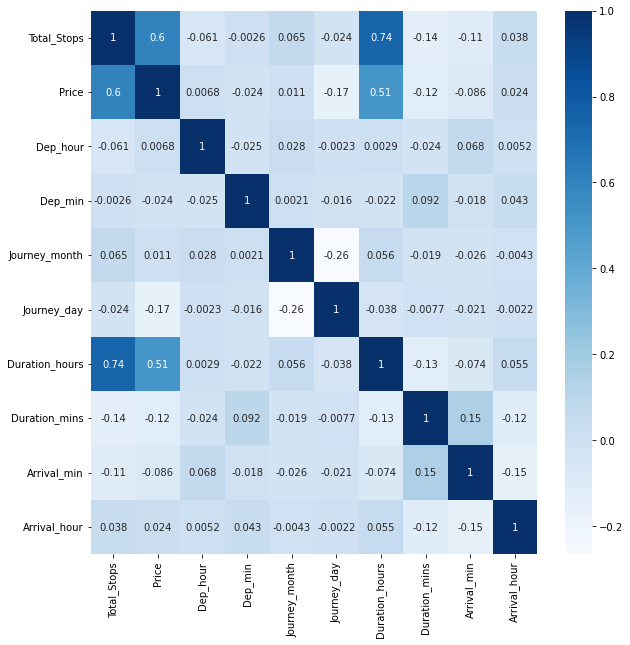

In [80]:
plt.figure(figsize = (10,10))
sns.heatmap(train_data.corr(), annot = True, cmap = "Blues")

plt.show()

## Determining feature importance

In [81]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

In [82]:
print(selection.feature_importances_)

[2.46481165e-01 1.10434517e-01 7.16009788e-02 2.27342387e-02
 2.10162411e-02 2.75768744e-02 2.07464670e-02 1.06165868e-01
 1.77366931e-02 9.23328096e-03 1.65188802e-03 1.86280691e-02
 1.38040826e-01 6.58875664e-02 1.94147272e-02 9.62378404e-04
 3.36150824e-03 1.12892741e-04 5.09526379e-03 1.44080543e-04
 5.69344704e-04 7.01601033e-03 4.41037870e-03 6.69869499e-03
 9.12164761e-03 1.90692613e-02 6.04765180e-03 5.77010198e-04
 2.26756204e-02 4.21711057e-03 1.25717454e-02]


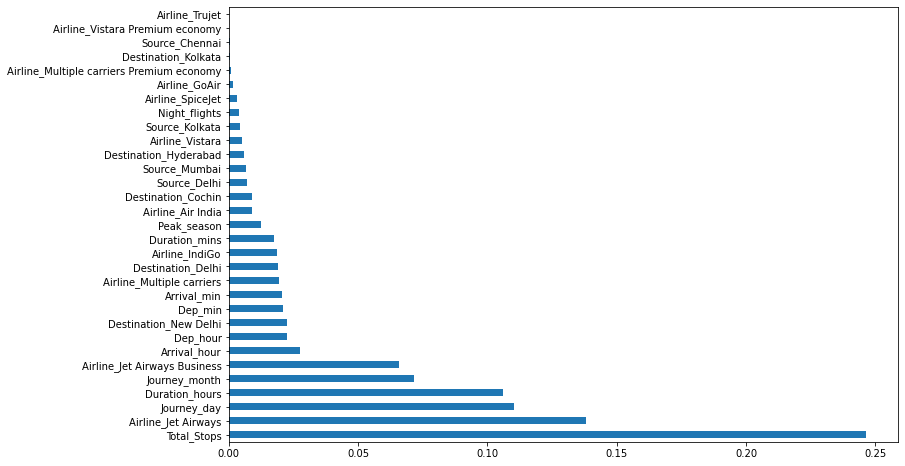

In [83]:
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(32).plot(kind='barh')
plt.show()

## Train Test Split

In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 32)

In [85]:
X_test.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Night_flights,Peak_season
8396,2,24,6,18,20,4,25,10,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1
9284,1,6,9,17,30,12,35,19,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
10609,0,5,12,12,0,13,30,1,30,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1
10229,0,3,3,19,35,22,5,2,30,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3874,1,27,3,2,15,15,30,13,15,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0


In [86]:
X_train.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Night_flights,Peak_season
4038,1,6,12,20,0,4,40,8,40,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1
3565,1,27,6,7,5,12,35,5,30,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1
6633,0,27,4,14,10,17,10,3,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1
5381,0,4,3,12,0,13,30,1,30,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
4269,1,5,12,8,25,4,40,20,15,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1


## XGBoost

In [85]:
!pip install xgboost

You should consider upgrading via the 'C:\Users\patil\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [87]:
from xgboost import XGBRegressor

In [87]:
#min_samples_split min_samples_leaf max_depth max_features learning_rate n_estimators subsample

In [88]:
xb_reg = XGBRegressor()

In [89]:
xb_reg.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [90]:
predictions = xb_reg.predict(X_test)

In [91]:
xb_reg.score(X_train, y_train)

0.9362082459663772

In [92]:
xb_reg.score(X_test, y_test)

0.8317956521067615

In [93]:
from sklearn import metrics

In [94]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 1181.0298348526337
MSE: 3237659.255367514
RMSE: 1799.3496756793868


## Hyperparameter Tuning

In [95]:
from sklearn.model_selection import RandomizedSearchCV

In [96]:
# Number of trees in random forest
n_estimators = [100,500,1000,1500,2000]
# Maximum number of levels in tree
max_depth = [5,7,10,15,20,25]
# learning rate
learning_rate = [0.1, 0.2, 0.3, 0.05, 0.01]
#The number of samples (rows) used in each tree
subsample = [0.3,0.35,0.5,0.6,0.65,0.7,0.75]
# Number of features (columns) used in each tree
colsample_bytree = [0.4,0.45,0.5,0.55,0.6,0.7]

xg_random_grid = {'n_estimators': n_estimators,
               'eta': learning_rate,
               'max_depth': max_depth,
               'subsample': subsample,
               'colsample_bytree': colsample_bytree}

In [97]:
xgb_random = RandomizedSearchCV(estimator = xb_reg, param_distributions = xg_random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=52, n_jobs = 2)

In [98]:
xgb_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          callbacks=None, colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, gamma=0, gpu_id=-1,
                                          grow_policy='depthwise',
                                          importance_type=None,
                                          interaction_constraints='',
                                          learning_rate=0.300000012,
                                          max_bin=256, m...
                                          num_parallel_tree=1, predictor='auto',
                                          random_state=0, reg_alpha=0,
                                          reg_lambda=1, ...),
                   n_jobs=2,
                   param_distributions={'colsample_bytree': [0.4, 0.45, 0.5,
                                                             0.55, 0.6, 0.7],
                                        'eta': [0.1, 0.2, 0.3, 0.05, 0.01],
                                        'max_depth': [5, 7, 10, 15, 20, 25],
                                        'n_estimators': [100, 500, 1000, 1500,
                                                         2000],
                                        'subsample': [0.3, 0.35, 0.5, 0.6, 0.65,
                                                      0.7, 0.75]},
                   random_state=52, scoring='neg_mean_squared_error',
                   verbose=2)

In [99]:
prediction_xg = xgb_random.predict(X_test)

In [100]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction_xg))
print('MSE:', metrics.mean_squared_error(y_test, prediction_xg))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction_xg)))

MAE: 1234.5954375063977
MSE: 3188926.4931723587
RMSE: 1785.7565604450006


In [101]:
xgb_random.best_params_

{'subsample': 0.7,
 'n_estimators': 500,
 'max_depth': 5,
 'eta': 0.05,
 'colsample_bytree': 0.45}

In [102]:
metrics.r2_score(y_test, prediction_xg)

0.8343274387586407

In [103]:
final_model = XGBRegressor(subsample=0.7, n_estimators=500, max_depth=5, eta=0.05, colsample_bytree=0.45)

In [104]:
final_model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.45,
             early_stopping_rounds=None, enable_categorical=False, eta=0.05,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.0500000007, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=500, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0, ...)

In [105]:
final_model.score(X_train, y_train)

0.8943862597610213

In [106]:
final_model.score(X_test, y_test)

0.8459998473785455

In [107]:
prediction_final = final_model.predict(X_test)

In [108]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction_final))
print('MSE:', metrics.mean_squared_error(y_test, prediction_final))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction_final)))

MAE: 1236.2552949497506
MSE: 2964251.671896911
RMSE: 1721.700227071168


## Saving the model

In [109]:
import pickle

In [111]:
pickle_file = open("flight_fare.pkl","wb")
pickle.dump(final_model, pickle_file)
pickle_file.close()